In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
scaler = MinMaxScaler()

df['Income($)'] = scaler.fit_transform(df[['Income($)']])
# Income($)을 정규화

df['Age'] = scaler.fit_transform(df[['Age']])
# Age을 정규화

df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [4]:
km = KMeans(n_clusters = 3)
# 클러스터 개수를 정해준다. 

km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
# 클러스터를 예측

y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [6]:
df['cluster'] = y_predicted
# 클러스터를 데이터에 추가

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [7]:
km.cluster_centers_
# 각 클러스터의 중심값

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

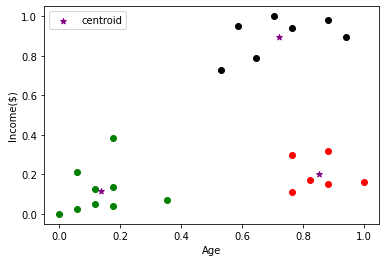

In [8]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
# 각 클러스터의 데이터프레임을 분류

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker = '*', label = 'centroid')
# 각 클러스터의 중심값을 지정

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [9]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
    # inertia_: Sum of squared distances of samples to their closest cluster center.

C:\Users\mwh51\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21055478995472496,
 0.17473586079225922,
 0.1397684499538816,
 0.10497488680620906]

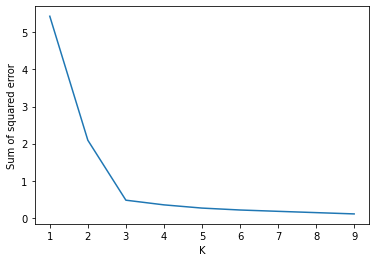

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
# Elbow Technique에 의해 클러스터의 수가 3일때 가장 에러가 적다.